In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.io.wavfile import read
import IPython.display as ipd

In [2]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 4))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate, normalize=False)) 

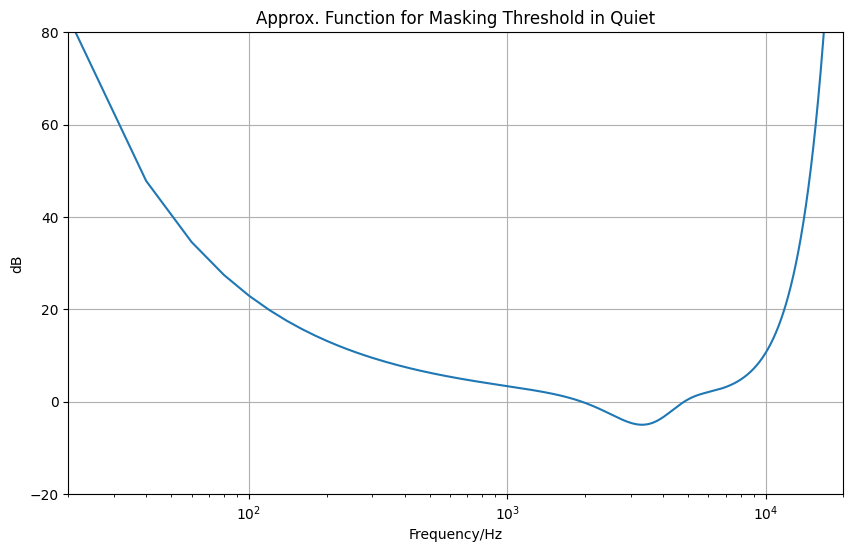

In [3]:
# compute and display the the threshold curve of quiet

f=np.linspace(20,20000,1000)
LTQ=3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.-3.3)**2.)+1e-3*((f/1000.)**4.)
plt.figure(figsize=(10,6))
plt.semilogx(f,LTQ)
plt.axis([20,20000, -20,80])
plt.xlabel('Frequency/Hz')
plt.ylabel('dB')
plt.title('Approx. Function for Masking Threshold in Quiet')
plt.grid()

/var/folders/l3/g0bl2h853g72yx1shwfkd7w00000gp/T/ipykernel_13171/3801934418.py:5: RuntimeWarning: divide by zero encountered in power
  LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.- 3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60)


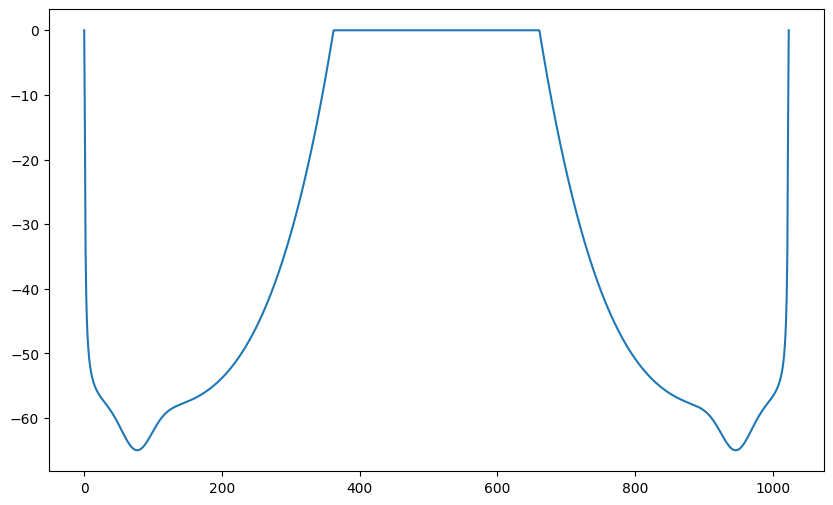

In [4]:
# adapt the magnitude threshold of quiet to a curve to be used in a spectrum
fs=44100    # sampling frequency
N=1024      # number of subbands
f=np.linspace(0,fs/2, N//2)
LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.- 3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60)
LTQ=np.append(LTQ-60, np.flip(LTQ-60))
plt.figure(figsize=(10,6))
plt.plot(LTQ)

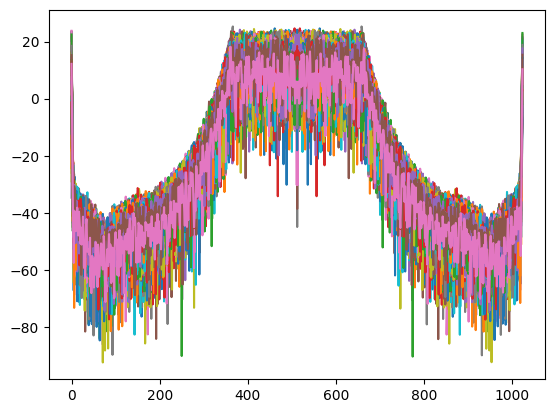

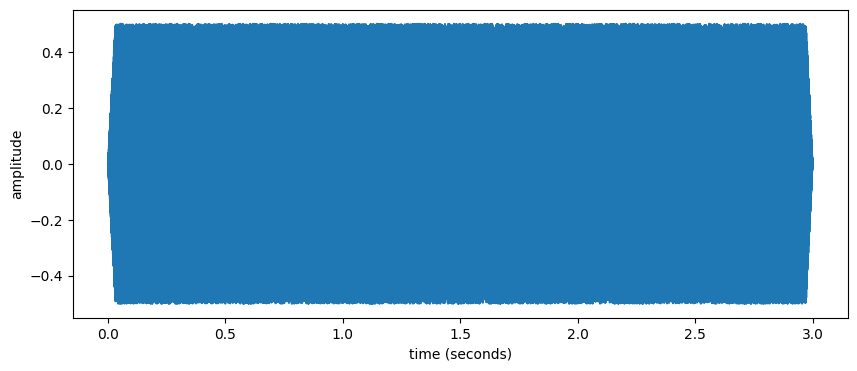

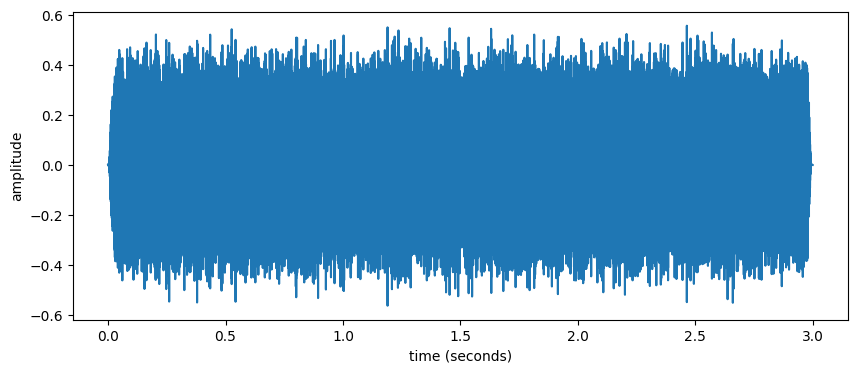

In [5]:
# apply the masking curve of quiet to a sound

x, fs = read_sound('../sounds/white-noise.wav')

y = np.zeros(len(x))
i = 0
while i < x.size-N:
  w = signal.get_window('hann', N)
  xw = x[i:i+N] * w
  X = fft(xw)
  mX = 20 * np.log10(abs(X))
  pX = np.angle(X)

  mX += LTQ
  plt.plot(mX)
  Y = 10 ** (mX/20) * np.exp(1j * pX)
  yt = np.real(ifft(Y))
  y[i:i+N] += yt
  i += N//2

display_sound(x, fs)
display_sound(y, fs)